<a href="https://colab.research.google.com/github/mvharsh/Deep-Learning/blob/main/CNN/CNN_Cat_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to training and testing directories
train_dir = '/content/drive/MyDrive/Train'
test_dir = '/content/drive/MyDrive/Test'



In [ ]:
# Define parameters for image preprocessing and augmentation
batch_size = 32
image_size = (150, 150)  # Resize images to 150x150 pixels

# Use ImageDataGenerator for loading and preprocessing images
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom transformations
    horizontal_flip=True)  # Horizontal flips

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for testing data

# Load training and testing datasets using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')  # 'binary' because we have two classes: cat and dog

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

# Check the classes that were automatically detected
class_names = list(train_generator.class_indices.keys())
print("Class names:", class_names)

# Check the shape of the data batches
print("Shape of training data batch:", train_generator[0][0].shape)
print("Shape of testing data batch:", test_generator[0][0].shape)

# Check the number of samples in training and testing sets
print("Number of training samples:", train_generator.samples)
print("Number of testing samples:", test_generator.samples)


Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Class names: ['Cat', 'Dog']
Shape of training data batch: (32, 150, 150, 3)
Shape of testing data batch: (32, 150, 150, 3)
Number of training samples: 2000
Number of testing samples: 400


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
62/62 [==============================] - 499s 8s/step - loss: 0.6949 - accuracy: 0.5117 - val_loss: 0.6993 - val_accuracy: 0.5026
Epoch 2/10
62/62 [==============================] - 114s 2s/step - loss: 0.6846 - accuracy: 0.5686 - val_loss: 0.6558 - val_accuracy: 0.6380
Epoch 3/10
62/62 [==============================] - 122s 2s/step - loss: 0.6759 - accuracy: 0.5854 - val_loss: 0.6923 - val_accuracy: 0.5234
Epoch 4/10
62/62 [==============================] - 113s 2s/step - loss: 0.6661 - accuracy: 0.5889 - val_loss: 0.6881 - val_accuracy: 0.5703
Epoch 5/10
62/62 [==============================] - 116s 2s/step - loss: 0.6549 - accuracy: 0.6052 - val_loss: 0.6654 - val_accuracy: 0.6146
Epoch 6/10
62/62 [==============================] - 116s 2s/step - loss: 0.6408 - accuracy: 0.6280 - val_loss: 0.6869 - val_accuracy: 0.5443
Epoch 7/10
62/62 [==============================] - 115s 2s/step - loss: 0.6393 - accuracy: 0.6585 - val_loss: 0.6236 - val_accuracy: 0.6380
Epoch 8/10
62

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 6s 441ms/step - loss: 0.6225 - accuracy: 0.6550
Test Loss: 0.6224749088287354
Test Accuracy: 0.6549999713897705


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict classes for test data
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = test_generator.classes

# Calculate additional performance metrics
print("\nAdditional Performance Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
print("\nROC AUC Score:", roc_auc_score(y_true, y_pred_prob))


13/13 [==============================] - 11s 731ms/step

Additional Performance Metrics:
Confusion Matrix:
[[ 63 137]
 [ 53 147]]

Classification Report:
              precision    recall  f1-score   support

         Cat       0.54      0.32      0.40       200
         Dog       0.52      0.73      0.61       200

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.50       400
weighted avg       0.53      0.53      0.50       400


ROC AUC Score: 0.5031


Enter the path to the uploaded image: /content/dog.jpg
1/1 [==============================] - 0s 57ms/step


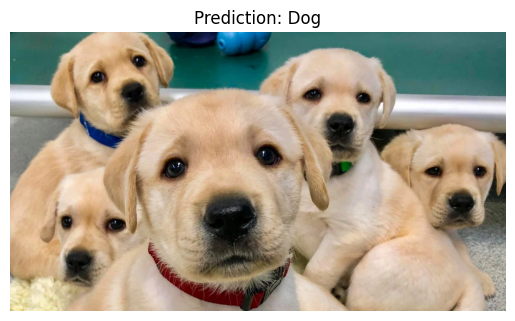

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array / 255.0  # Rescale pixel values to [0, 1]

# Function to predict the class of the uploaded image
def predict_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Dog"
    else:
        return "Cat"

# Example usage:
uploaded_image_path = input("Enter the path to the uploaded image: ")
prediction = predict_image(uploaded_image_path)

# Display the uploaded image and the prediction
img = image.load_img(uploaded_image_path)
plt.imshow(img)
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()
